# Introduction

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance or forecast a company's earnings based on past periods.

KEY TAKEAWAYS
1. Autoregressive integrated moving average (ARIMA) models predict future values based on past values.
2. ARIMA makes use of lagged moving averages to smooth time series data.
3. They are widely used in technical analysis to forecast future security prices.
4. Autoregressive models implicitly assume that the future will resemble the past.
5. Therefore, they can prove inaccurate under certain market conditions, such as financial crises or periods of rapid technological change.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import datetime
from pandas import read_csv

# Load Dataset and divide in Test/Train

In [2]:
# load dataset
series = read_csv(
    r'C:\Users\ahtis\OneDrive\Desktop\data\data.csv', header=0, index_col=0)
#series.index = series.index.to_period('M')
# split into train and test sets
test = 72
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:8640], X[8640:8640+test]
history = [x for x in train]
predictions = list()

# Walk-Forward Validation for Prediction

In [3]:
# walk-forward validation
start_time = time.time()
for t in range(len(test)):
    model = ARIMA(history, order=(7, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
print("--- %s seconds ---" % (time.time() - start_time))

predicted=107.895514, expected=111.000000
predicted=113.573112, expected=115.000000
predicted=117.664690, expected=119.000000
predicted=121.597037, expected=125.000000
predicted=127.912189, expected=131.000000
predicted=133.954907, expected=138.000000
predicted=141.362009, expected=142.000000
predicted=144.814096, expected=150.000000
predicted=153.719667, expected=156.000000
predicted=159.386098, expected=164.000000
predicted=167.825130, expected=172.000000
predicted=176.119387, expected=180.000000
predicted=184.239356, expected=187.000000
predicted=191.095999, expected=193.000000
predicted=196.648060, expected=196.000000
predicted=198.610565, expected=191.000000
predicted=190.787513, expected=185.000000
predicted=183.170378, expected=180.000000
predicted=177.334585, expected=167.000000
predicted=161.529453, expected=150.000000
predicted=142.462898, expected=132.000000
predicted=123.216654, expected=112.000000
predicted=101.785980, expected=100.000000
predicted=91.312270, expected=90.0

# Evaluation

Test RMSE: 3.958
Test MAE: 2.964


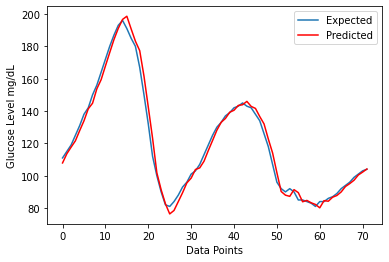

In [4]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test, label='Expected' )
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.xlabel("Data Points")
pyplot.ylabel("Glucose Level mg/dL")
pyplot.show()